In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import eval_models
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

# Digits

In [3]:
X_dig_train,X_dig_test,y_dig_train,y_dig_test = eval_models.get_train_test('digits')

In [4]:
X_dig_train, X_dig_test = eval_models.drop_constants(X_dig_train, X_dig_test)

In [5]:
digits_results = pd.DataFrame(columns = ['Classifier', 'BA score', 'Wrapper', 'k', 'scaled'])
ss = StandardScaler()
X_dig_train_scaled = pd.DataFrame(ss.fit_transform(X_dig_train), columns=X_dig_train.columns)
X_dig_test_scaled = pd.DataFrame(ss.transform(X_dig_test), columns=X_dig_test.columns)
for k in [50, 100, 150, 200, 250, 300, 350]:
    for scale in [False, True]:
        if scale:
            X_train = X_dig_train_scaled
            X_test = X_dig_test_scaled
        else:
            X_train = X_dig_train
            X_test = X_dig_test
        k_res = eval_models.estimator_wrappers(X_train, X_test, y_dig_train, y_dig_test)
        k_res['k'] = k
        k_res['scaled'] = scale
        digits_results = pd.concat((digits_results, k_res), ignore_index=True)

[21:08:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:59] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:20:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:21:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [30]:
digits_results['score'] = digits_results['BA score'] - 0.01 * np.maximum(0, 0.005*digits_results['k']-0.25)
digits_results

,Classifier,BA score,Wrapper,k,scaled,score
0,LogisticRegression,0.908667,RandomForestClassifier,50,False,0.908667
1,RandomForestClassifier,0.951333,RandomForestClassifier,50,False,0.951333
2,AdaBoostClassifier,0.903333,RandomForestClassifier,50,False,0.903333
3,LGBMClassifier,0.955333,RandomForestClassifier,50,False,0.955333
4,XGBClassifier,0.952000,RandomForestClassifier,50,False,0.952
...,...,...,...,...,...,...
205,LogisticRegression,0.958000,LogisticRegression,350,True,0.943
206,RandomForestClassifier,0.960667,LogisticRegression,350,True,0.945667
207,AdaBoostClassifier,0.954000,LogisticRegression,350,True,0.939
208,LGBMClassifier,0.966667,LogisticRegression,350,True,0.951667


# Artificial

In [7]:
X_art_train,X_art_test,y_art_train,y_art_test = eval_models.get_train_test('artificial')

In [8]:
X_art_train, X_art_test = eval_models.drop_constants(X_art_train, X_art_test)

In [33]:
art_results = pd.DataFrame(columns = ['Classifier', 'BA score', 'Wrapper', 'k', 'scaled'])
ss_art = StandardScaler()
X_art_train_scaled = pd.DataFrame(ss_art.fit_transform(X_art_train), columns=X_art_train.columns)
X_art_test_scaled = pd.DataFrame(ss_art.transform(X_art_test), columns=X_art_test.columns)
for k in [5, 10, 15, 20, 25, 30, 35]:
    for scale in [False, True]:
        if scale:
            X_train = X_art_train_scaled
            X_test = X_art_test_scaled
        else:
            X_train = X_art_train
            X_test = X_art_test
        k_res_art = eval_models.estimator_wrappers(X_train, X_test, y_art_train, y_art_test)
        k_res_art['k'] = k
        k_res_art['scaled'] = scale
        art_results = pd.concat((art_results, k_res_art), ignore_index=True)

[00:02:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:03:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[00:40:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:41:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [34]:
art_results['score'] = art_results['BA score'] - 0.01 * np.maximum(0, 0.2*art_results['k']-1)
art_results

,Classifier,BA score,Wrapper,k,scaled,score
0,LogisticRegression,0.558,RandomForestClassifier,5,False,0.558
1,RandomForestClassifier,0.858,RandomForestClassifier,5,False,0.858
2,AdaBoostClassifier,0.606,RandomForestClassifier,5,False,0.606
3,LGBMClassifier,0.826,RandomForestClassifier,5,False,0.826
4,XGBClassifier,0.830,RandomForestClassifier,5,False,0.83
...,...,...,...,...,...,...
205,LogisticRegression,0.514,LogisticRegression,35,True,0.454
206,RandomForestClassifier,0.718,LogisticRegression,35,True,0.658
207,AdaBoostClassifier,0.596,LogisticRegression,35,True,0.536
208,LGBMClassifier,0.786,LogisticRegression,35,True,0.726


# Visualization

In [11]:
vis_digits = digits_results.sort_values('BA score', ascending=False).groupby(['k', 'Wrapper']).first().reset_index()
vis_digits

,k,Wrapper,Classifier,BA score,scaled
0,50,AdaBoostClassifier,XGBClassifier,0.968000,True
1,50,LogisticRegression,XGBClassifier,0.965333,True
2,50,RandomForestClassifier,LGBMClassifier,0.956000,True
3,100,AdaBoostClassifier,LGBMClassifier,0.968000,False
4,100,LogisticRegression,XGBClassifier,0.966000,True
5,100,RandomForestClassifier,XGBClassifier,0.960667,False
6,150,AdaBoostClassifier,XGBClassifier,0.968000,False
7,150,LogisticRegression,XGBClassifier,0.967333,True
8,150,RandomForestClassifier,XGBClassifier,0.961333,False
9,200,AdaBoostClassifier,XGBClassifier,0.968000,True


In [26]:
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 25

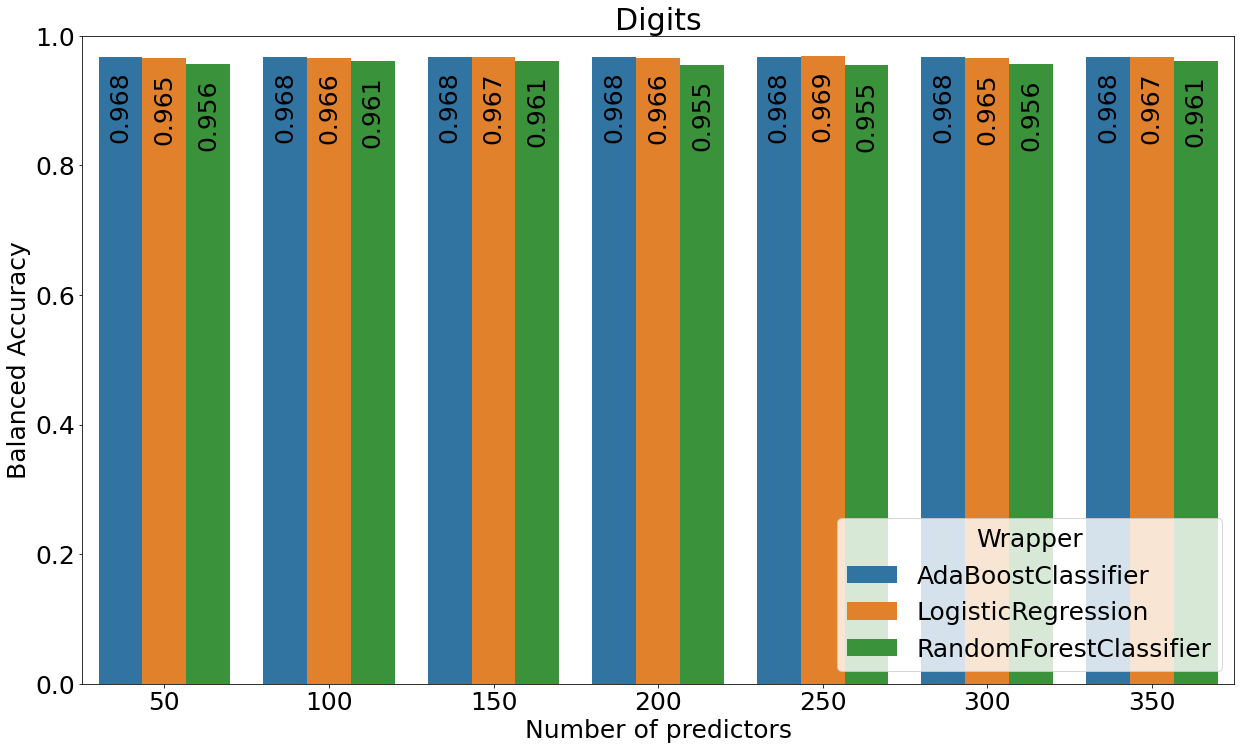

In [37]:
bars = sns.barplot(x='k', y='BA score', hue='Wrapper', data=vis_digits)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()-0.09), ha='center', va='center', xytext=(0, 8), rotation=90,
                   textcoords='offset points')
plt.legend(loc=4, title='Wrapper')
plt.ylim(0, 1)
plt.xlabel('Number of predictors')
plt.ylabel('Balanced Accuracy')
plt.title('Digits')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("../images/wrappers_digits_o.svg")
plt.show()

In [38]:
vis_art = art_results.sort_values('BA score', ascending=False).groupby(['k', 'Wrapper']).first().reset_index()
vis_art

,k,Wrapper,Classifier,BA score,scaled,score
0,5,AdaBoostClassifier,XGBClassifier,0.812,True,0.812
1,5,LogisticRegression,LGBMClassifier,0.786,True,0.786
2,5,RandomForestClassifier,RandomForestClassifier,0.858,False,0.858
3,10,AdaBoostClassifier,XGBClassifier,0.812,True,0.802
4,10,LogisticRegression,LGBMClassifier,0.786,True,0.776
5,10,RandomForestClassifier,RandomForestClassifier,0.864,False,0.854
6,15,AdaBoostClassifier,XGBClassifier,0.812,True,0.792
7,15,LogisticRegression,LGBMClassifier,0.786,True,0.766
8,15,RandomForestClassifier,RandomForestClassifier,0.852,False,0.832
9,20,AdaBoostClassifier,XGBClassifier,0.812,True,0.782


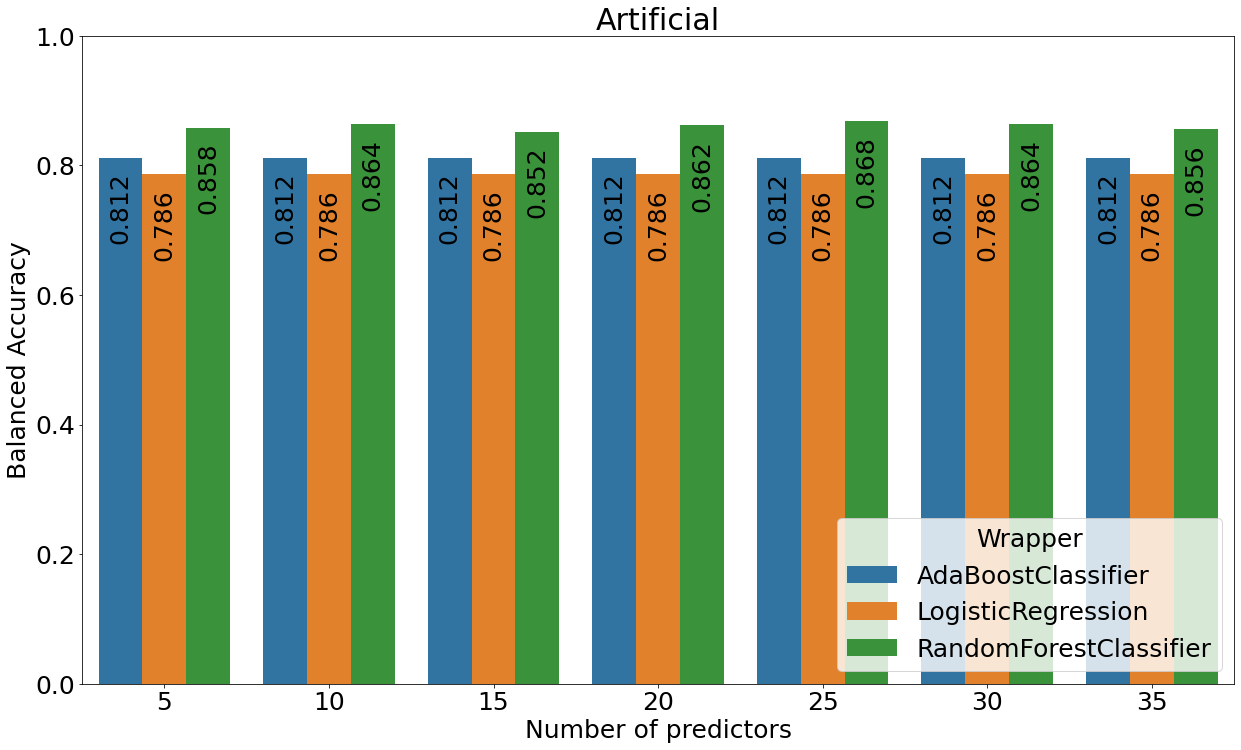

In [39]:
bars = sns.barplot(x='k', y='BA score', hue='Wrapper', data=vis_art)
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.3f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()-0.09), ha='center', va='center', xytext=(0, 8), rotation=90,
                   textcoords='offset points')
plt.legend(loc=4, title='Wrapper')
plt.ylim(0, 1)
plt.xlabel('Number of predictors')
plt.ylabel('Balanced Accuracy')
plt.title('Artificial')
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("../images/wrappers_artificial_o.svg")
plt.show()